In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [261]:
df = pd.read_csv("AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
df = df2.set_index('Date')
data = df2.set_index('Date')

In [262]:
data

,Price
Date,
2019-01-02,39.48
2019-01-03,35.55
2019-01-04,37.07
2019-01-07,36.98
2019-01-08,37.69
...,...
2023-12-22,193.60
2023-12-26,193.05
2023-12-27,193.15


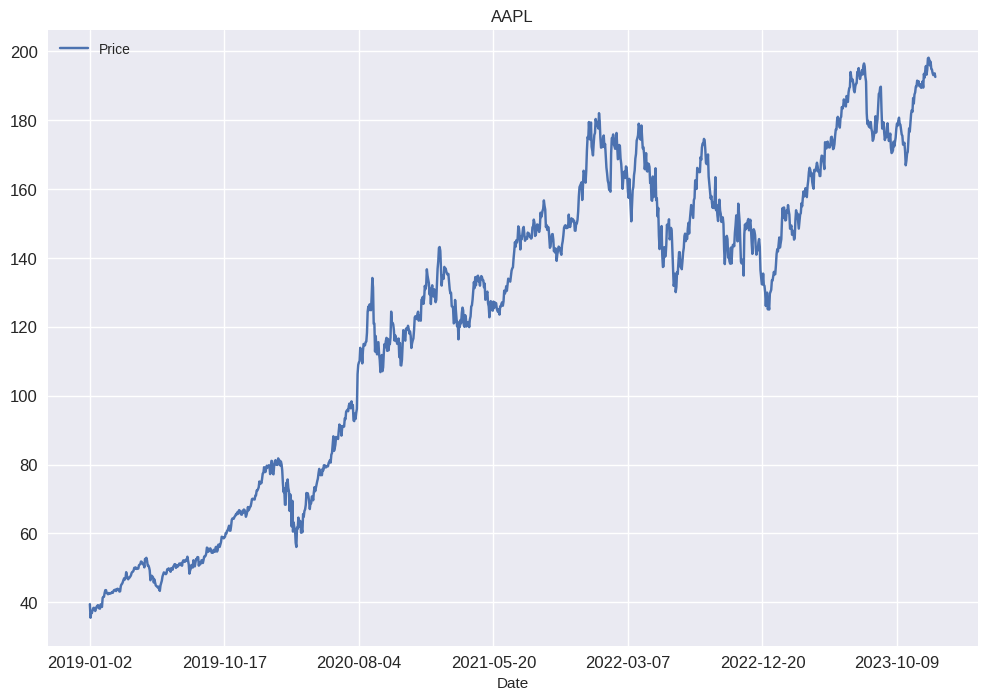

In [263]:
data.plot(figsize = (12, 8), title = "AAPL", fontsize = 12)
plt.show()

In [264]:
data.Price.diff()

,Price
Date,
2019-01-02,NaN
2019-01-03,-3.93
2019-01-04,1.52
2019-01-07,-0.09
2019-01-08,0.71
...,...
2023-12-22,-1.08
2023-12-26,-0.55
2023-12-27,0.10


In [265]:
data["U"] = np.where(data.Price.diff() > 0, data.Price.diff(), 0)

In [266]:
data["D"] = np.where(data.Price.diff() < 0, -data.Price.diff(), 0)

In [267]:
data

,Price,U,D
Date,,,
2019-01-02,39.48,0.00,0.00
2019-01-03,35.55,0.00,3.93
2019-01-04,37.07,1.52,0.00
2019-01-07,36.98,0.00,0.09
2019-01-08,37.69,0.71,0.00
...,...,...,...
2023-12-22,193.60,0.00,1.08
2023-12-26,193.05,0.00,0.55
2023-12-27,193.15,0.10,0.00


In [268]:
periods = 20

In [269]:
data["MA_U"] = data.U.rolling(periods).mean()

In [270]:
data["MA_D"] = data.D.rolling(periods).mean()

In [271]:
data["RSI"] = data.MA_U / (data.MA_U + data.MA_D) * 100

In [272]:
data.dropna(inplace = True)

In [273]:
data

,Price,U,D,MA_U,MA_D,RSI
Date,,,,,,
2019-01-30,41.31,2.64,0.00,0.4375,0.3460,55.839183
2019-01-31,41.61,0.30,0.00,0.4525,0.3460,56.668754
2019-02-01,41.63,0.02,0.00,0.4535,0.1495,75.207297
2019-02-04,42.81,1.18,0.00,0.4365,0.1495,74.488055
2019-02-05,43.55,0.74,0.00,0.4735,0.1450,76.556184
...,...,...,...,...,...,...
2023-12-22,193.60,0.00,1.08,0.7920,0.6105,56.470588
2023-12-26,193.05,0.00,0.55,0.7920,0.6290,55.735398
2023-12-27,193.15,0.10,0.00,0.7665,0.6290,54.926550


In [274]:
rsi_upper = 70
rsi_lower = 30

In [275]:
data["position"] = np.where(data.RSI > rsi_upper, -1, np.nan) # 1. overbought -> go short

In [276]:
data["position"] = np.where(data.RSI < rsi_lower, 1, data.position) # 2. oversold -> go long

In [277]:
data.position = data.position.fillna(0) # 3. where 1 & 2 isn´t applicable -> neutral

In [278]:
data

,Price,U,D,MA_U,MA_D,RSI,position
Date,,,,,,,
2019-01-30,41.31,2.64,0.00,0.4375,0.3460,55.839183,0.0
2019-01-31,41.61,0.30,0.00,0.4525,0.3460,56.668754,0.0
2019-02-01,41.63,0.02,0.00,0.4535,0.1495,75.207297,-1.0
2019-02-04,42.81,1.18,0.00,0.4365,0.1495,74.488055,-1.0
2019-02-05,43.55,0.74,0.00,0.4735,0.1450,76.556184,-1.0
...,...,...,...,...,...,...,...
2023-12-22,193.60,0.00,1.08,0.7920,0.6105,56.470588,0.0
2023-12-26,193.05,0.00,0.55,0.7920,0.6290,55.735398,0.0
2023-12-27,193.15,0.10,0.00,0.7665,0.6290,54.926550,0.0


In [279]:
data.position.value_counts()

,count
position,
0.0,943
-1.0,260
1.0,36


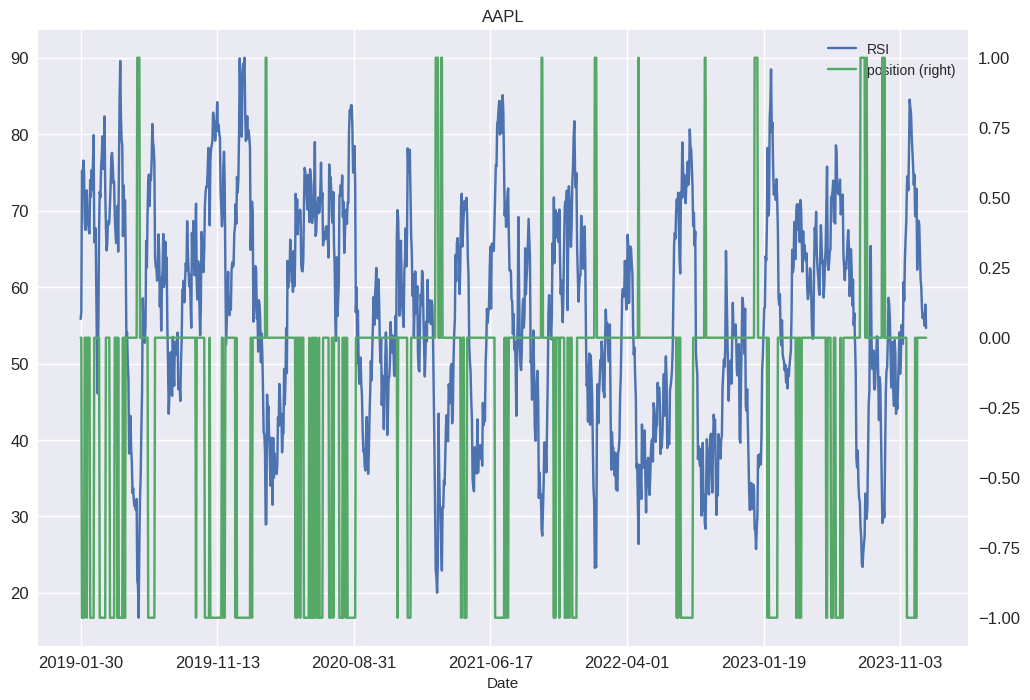

In [280]:
data.loc[:, ["RSI", "position"]].plot(figsize = (12, 8), fontsize = 12,
                                                      secondary_y = "position", title = "AAPL")
plt.show()

In [281]:
data["returns"] = np.log(data.Price.div(data.Price.shift(1)))

In [282]:
data.dropna(inplace = True)

In [283]:
data

,Price,U,D,MA_U,MA_D,RSI,position,returns
Date,,,,,,,,
2019-01-31,41.61,0.30,0.00,0.4525,0.3460,56.668754,0.0,0.007236
2019-02-01,41.63,0.02,0.00,0.4535,0.1495,75.207297,-1.0,0.000481
2019-02-04,42.81,1.18,0.00,0.4365,0.1495,74.488055,-1.0,0.027951
2019-02-05,43.55,0.74,0.00,0.4735,0.1450,76.556184,-1.0,0.017138
2019-02-06,43.56,0.01,0.00,0.4385,0.1450,75.149957,-1.0,0.000230
...,...,...,...,...,...,...,...,...
2023-12-22,193.60,0.00,1.08,0.7920,0.6105,56.470588,0.0,-0.005563
2023-12-26,193.05,0.00,0.55,0.7920,0.6290,55.735398,0.0,-0.002845
2023-12-27,193.15,0.10,0.00,0.7665,0.6290,54.926550,0.0,0.000518


In [284]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [285]:
data

,Price,U,D,MA_U,MA_D,RSI,position,returns,strategy
Date,,,,,,,,,
2019-01-31,41.61,0.30,0.00,0.4525,0.3460,56.668754,0.0,0.007236,NaN
2019-02-01,41.63,0.02,0.00,0.4535,0.1495,75.207297,-1.0,0.000481,0.000000
2019-02-04,42.81,1.18,0.00,0.4365,0.1495,74.488055,-1.0,0.027951,-0.027951
2019-02-05,43.55,0.74,0.00,0.4735,0.1450,76.556184,-1.0,0.017138,-0.017138
2019-02-06,43.56,0.01,0.00,0.4385,0.1450,75.149957,-1.0,0.000230,-0.000230
...,...,...,...,...,...,...,...,...,...
2023-12-22,193.60,0.00,1.08,0.7920,0.6105,56.470588,0.0,-0.005563,-0.000000
2023-12-26,193.05,0.00,0.55,0.7920,0.6290,55.735398,0.0,-0.002845,-0.000000
2023-12-27,193.15,0.10,0.00,0.7665,0.6290,54.926550,0.0,0.000518,0.000000


In [286]:
data.dropna(inplace = True)

In [287]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [288]:
data

,Price,U,D,MA_U,MA_D,RSI,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,,,,
2019-02-01,41.63,0.02,0.00,0.4535,0.1495,75.207297,-1.0,0.000481,0.000000,1.000481,1.000000
2019-02-04,42.81,1.18,0.00,0.4365,0.1495,74.488055,-1.0,0.027951,-0.027951,1.028839,0.972436
2019-02-05,43.55,0.74,0.00,0.4735,0.1450,76.556184,-1.0,0.017138,-0.017138,1.046623,0.955913
2019-02-06,43.56,0.01,0.00,0.4385,0.1450,75.149957,-1.0,0.000230,-0.000230,1.046864,0.955693
2019-02-07,42.74,0.00,0.82,0.4065,0.1860,68.607595,0.0,-0.019004,0.019004,1.027157,0.974029
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,193.60,0.00,1.08,0.7920,0.6105,56.470588,0.0,-0.005563,-0.000000,4.652728,0.920430
2023-12-26,193.05,0.00,0.55,0.7920,0.6290,55.735398,0.0,-0.002845,-0.000000,4.639510,0.920430
2023-12-27,193.15,0.10,0.00,0.7665,0.6290,54.926550,0.0,0.000518,0.000000,4.641913,0.920430


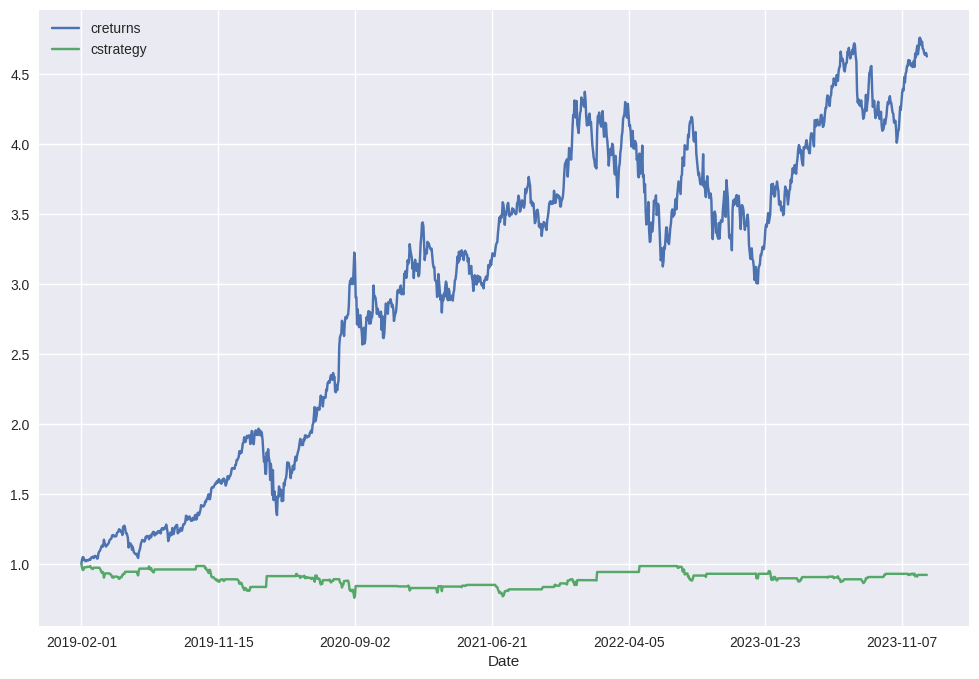

In [289]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8))
plt.show()

In [290]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [291]:
from RSIBacktester import RSIBacktester as RSI

In [292]:
ptc = 0

In [293]:
tester = RSI("Price", periods = 20, rsi_upper = 70, rsi_lower = 30,
              start = "2/1/2019", end = "29/12/2023", tc = ptc)

In [294]:
tester.data

,price,returns,U,D,MA_U,MA_D,RSI
Date,,,,,,,
2/1/2019,39.48,NaN,0.00,0.00,NaN,NaN,NaN
3/1/2019,35.55,-0.104854,0.00,3.93,NaN,NaN,NaN
4/1/2019,37.07,0.041868,1.52,0.00,NaN,NaN,NaN
7/1/2019,36.98,-0.002431,0.00,0.09,NaN,NaN,NaN
8/1/2019,37.69,0.019018,0.71,0.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...
22/12/2023,193.60,-0.005563,0.00,1.08,0.7920,0.6105,56.470588
26/12/2023,193.05,-0.002845,0.00,0.55,0.7920,0.6290,55.735398
27/12/2023,193.15,0.000518,0.10,0.00,0.7665,0.6290,54.926550


In [295]:
tester.test_strategy()

(0.92043, -3.740185)

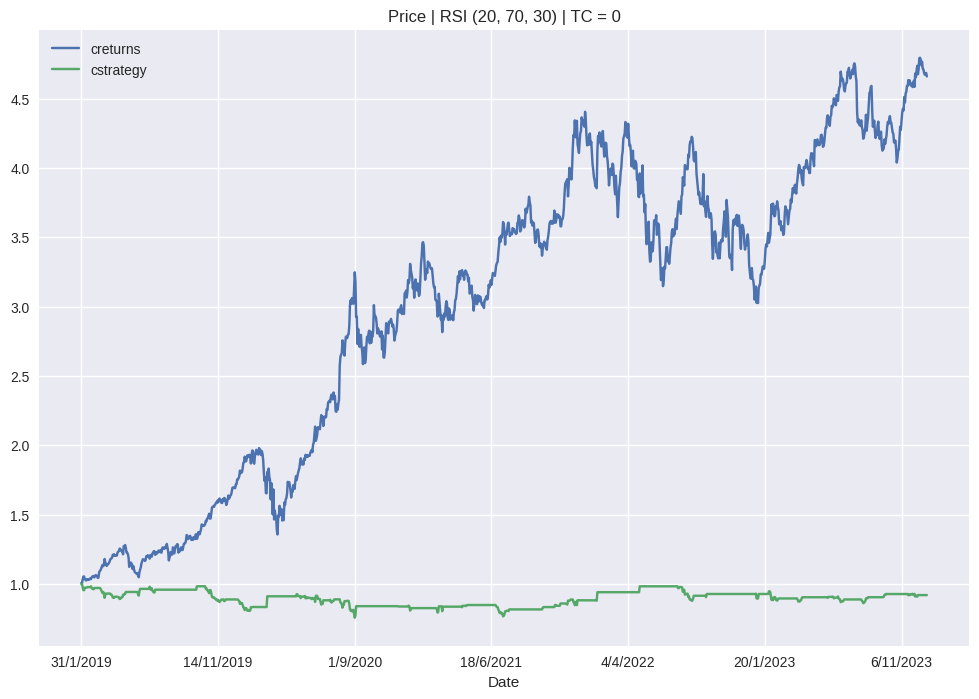

In [296]:
tester.plot_results()

In [297]:
tester.results

,price,returns,U,D,MA_U,MA_D,RSI,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,
31/1/2019,41.61,0.007236,0.30,0.00,0.4525,0.3460,56.668754,0.0,0.000000,0.0,1.007262,1.000000
1/2/2019,41.63,0.000481,0.02,0.00,0.4535,0.1495,75.207297,-1.0,0.000000,1.0,1.007746,1.000000
4/2/2019,42.81,0.027951,1.18,0.00,0.4365,0.1495,74.488055,-1.0,-0.027951,0.0,1.036311,0.972436
5/2/2019,43.55,0.017138,0.74,0.00,0.4735,0.1450,76.556184,-1.0,-0.017138,0.0,1.054224,0.955913
6/2/2019,43.56,0.000230,0.01,0.00,0.4385,0.1450,75.149957,-1.0,-0.000230,0.0,1.054466,0.955693
...,...,...,...,...,...,...,...,...,...,...,...,...
22/12/2023,193.60,-0.005563,0.00,1.08,0.7920,0.6105,56.470588,0.0,-0.000000,0.0,4.686517,0.920430
26/12/2023,193.05,-0.002845,0.00,0.55,0.7920,0.6290,55.735398,0.0,-0.000000,0.0,4.673203,0.920430
27/12/2023,193.15,0.000518,0.10,0.00,0.7665,0.6290,54.926550,0.0,0.000000,0.0,4.675623,0.920430


## optimize parameters

In [298]:
tester.optimize_parameters((5, 31, 1), (65, 80, 1), (20, 40, 1)) # high volatility

/content/RSIBacktester.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data.RSI > self.rsi_upper, -1, np.nan)
/content/RSIBacktester.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["position"] = np.where(data.RSI < self.rsi_lower, 1, data.position)
/content/RSIBacktester.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

(array([22., 76., 37.]), 2.646812)

In [299]:
tester = RSI("Price", periods = 22, rsi_upper = 76, rsi_lower = 37,
              start = "2/1/2019", end = "29/12/2023", tc = ptc)

In [300]:
tester.test_strategy()

(2.646812, -1.977978)

In [301]:
tester.results

,price,returns,U,D,MA_U,MA_D,RSI,position,strategy,trades,creturns,cstrategy
Date,,,,,,,,,,,,
4/2/2019,42.81,0.027951,1.18,0.00,0.465909,0.314545,59.697146,0.0,0.000000,0.0,1.028345,1.000000
5/2/2019,43.55,0.017138,0.74,0.00,0.499545,0.135909,78.612303,-1.0,0.000000,1.0,1.046121,1.000000
6/2/2019,43.56,0.000230,0.01,0.00,0.430909,0.135909,76.022454,-1.0,-0.000230,0.0,1.046361,0.999770
7/2/2019,42.74,-0.019004,0.00,0.82,0.430909,0.169091,71.818182,0.0,0.019004,1.0,1.026663,1.018952
8/2/2019,42.60,-0.003281,0.00,0.14,0.398636,0.175455,69.437846,0.0,-0.000000,0.0,1.023301,1.018952
...,...,...,...,...,...,...,...,...,...,...,...,...
22/12/2023,193.60,-0.005563,0.00,1.08,0.750455,0.615909,54.923486,0.0,-0.000000,0.0,4.650492,2.646812
26/12/2023,193.05,-0.002845,0.00,0.55,0.720000,0.640909,52.905812,0.0,-0.000000,0.0,4.637281,2.646812
27/12/2023,193.15,0.000518,0.10,0.00,0.724545,0.580000,55.540070,0.0,0.000000,0.0,4.639683,2.646812


## Return (01/01/2024 - 30/09/2024)

In [302]:
df = pd.read_csv("2024 AAPL.csv")
df2 = df.drop(["Open",'High', 'Low','Volume'], axis=1)
df2 = df2.rename(columns={'Close': 'Price'})
data1 = df2.set_index('Date')

In [303]:
data1.Price.diff()

,Price
Date,
2024-01-02,NaN
2024-01-03,-1.39
2024-01-04,-2.34
2024-01-05,-0.73
2024-01-08,4.38
...,...
2024-09-24,0.90
2024-09-25,-1.00
2024-09-26,1.15


In [304]:
data1["U"] = np.where(data1.Price.diff() > 0, data1.Price.diff(), 0)
data1["D"] = np.where(data1.Price.diff() < 0, -data1.Price.diff(), 0)

In [305]:
periods = 22

In [306]:
data1["MA_U"] = data1.U.rolling(periods).mean()
data1["MA_D"] = data1.D.rolling(periods).mean()
data1["RSI"] = data1.MA_U / (data1.MA_U + data1.MA_D) * 100
data1.dropna(inplace = True)

In [307]:
rsi_upper = 76
rsi_lower = 37

In [309]:
data1["position"] = np.where(data1.RSI > rsi_upper, -1, np.nan)
data1["position"] = np.where(data1.RSI < rsi_lower, 1, data1.position)
data1.position = data1.position.fillna(0)

In [310]:
data1["returns"] = np.log(data1.Price.div(data1.Price.shift(1)))

In [311]:
data1.dropna(inplace = True)

In [312]:
data1["strategy"] = data1.position.shift(1) * data1["returns"]

In [313]:
data1.dropna(inplace = True)

In [314]:
data1["creturns"] = data1["returns"].cumsum().apply(np.exp)
data1["cstrategy"] = data1["strategy"].cumsum().apply(np.exp)

In [315]:
data1

,Price,U,D,MA_U,MA_D,RSI,position,returns,strategy,creturns,cstrategy
Date,,,,,,,,,,,
2024-02-05,187.68,1.83,0.00,1.025000,0.869091,54.115671,0.0,0.009798,0.0,1.009847,1.000000
2024-02-06,189.30,1.62,0.00,1.098636,0.762727,59.023199,0.0,0.008595,0.0,1.018563,1.000000
2024-02-07,189.41,0.11,0.00,1.103636,0.729545,60.203323,0.0,0.000581,0.0,1.019155,1.000000
2024-02-08,188.32,0.00,1.09,0.904545,0.779091,53.725702,0.0,-0.005771,-0.0,1.013290,1.000000
2024-02-09,188.85,0.53,0.00,0.928636,0.760000,54.993271,0.0,0.002810,0.0,1.016142,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-09-24,227.37,0.90,0.00,1.115000,0.985909,53.072263,0.0,0.003966,0.0,1.223406,1.043548
2024-09-25,226.37,0.00,1.00,1.010000,1.031364,49.476731,0.0,-0.004408,-0.0,1.218025,1.043548
2024-09-26,227.52,1.15,0.00,1.046818,1.031364,50.371829,0.0,0.005067,0.0,1.224213,1.043548
